In [1]:
import pandas as pd
import numpy as np

#### Note: The following javascript is to disallow scrollable iframes for plotting. It may or may not work depending on your browser.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Duplicate and format data

In [3]:
airportData = pd.read_csv('project1.csv')
airportData.columns =['Airlines','Status',airportData.columns[2],airportData.columns[3],airportData.columns[4],airportData.columns[5],airportData.columns[6]]

#### Airport Data with raw headers

In [4]:
airportData

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


#### Renaming Headers and dropping the NaN row

In [5]:
airportData = airportData.dropna(how='all')

#### Replace cells NaN with respective values ALASKA and AM WEST

In [6]:
airportData.at[1,'Airlines'] = 'ALASKA'
airportData.at[4,'Airlines'] = 'AM WEST'

In [7]:
airportData

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


In [8]:
indexHeaderList = airportData['Airlines']+ ' - ' + airportData['Status']
#airportData.index = indexHeaderList
#airportData.pop('Status')
#airportData.pop('Airlines')
airportData


,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AM WEST,delayed,117.0,415.0,65.0,129.0,61.0


####  This is the lengthy operation to determine which percentage of flights are delayed for Alaska Airlines

In [9]:
alaskaList = []
for airlines in airportData['Airlines']:
    if airlines == 'ALASKA':
        alaskaList.append(True)
    else:
        alaskaList.append(False)

#### This is the other, quicker method to filter data

In [10]:
airportData[airportData['Airlines']== 'ALASKA']

,Airlines,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,479.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0


___

## groupby method to sort items

In [11]:
totalFlights = airportData.groupby('Airlines').sum()
totalFlights

,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
Airlines,,,,,
ALASKA,541.0,233.0,232.0,605.0,2146.0
AM WEST,811.0,5255.0,448.0,449.0,262.0


#### Using the transpose Method to reverse columns and indexs so that we may use them in a pie chart

In [12]:
totalFlights=totalFlights.T

array([<AxesSubplot:ylabel='ALASKA'>, <AxesSubplot:ylabel='AM WEST'>],
      dtype=object)

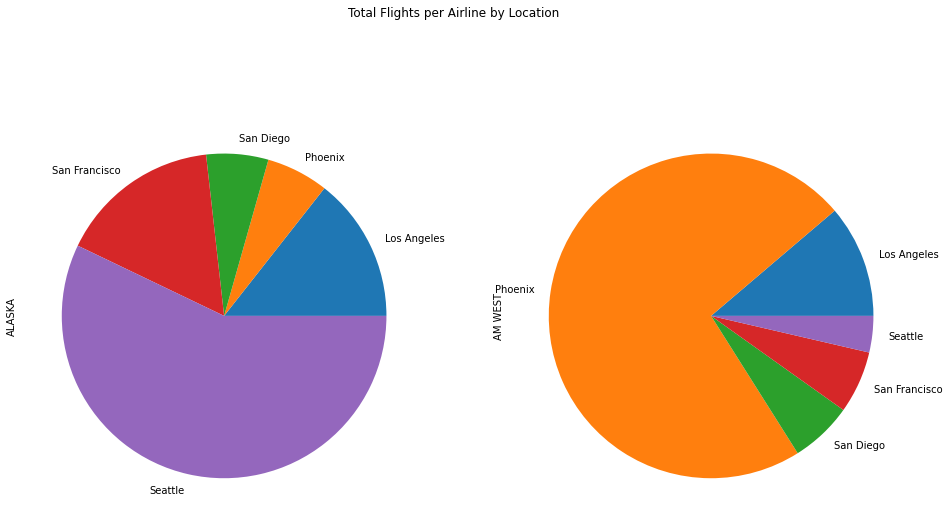

In [13]:
totalFlights.plot.pie(subplots=True, figsize=(16, 9), title='Total Flights per Airline by Location', legend=False)

___

# Visualizing delayed flights based on Airlines

<AxesSubplot:title={'center':'Total Flights vs Flights Delayed: Alaska Airlines'}>

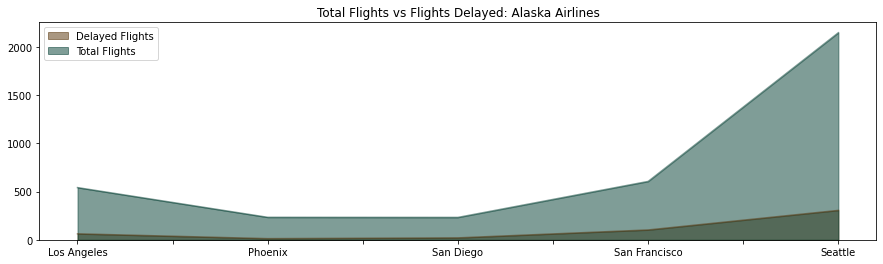

In [14]:
alaskatotalFlights = airportData.loc[0:2,'Los Angeles':].sum()
alaskaDelayedFlights = airportData.loc[1,'Los Angeles':]
alaskaFlights =  pd.DataFrame({'Delayed Flights': alaskaDelayedFlights,'Total Flights':alaskatotalFlights})
alaskaFlights.plot.area(title='Total Flights vs Flights Delayed: Alaska Airlines', figsize=(15,4), stacked = False, colormap = 'BrBG')

<AxesSubplot:title={'center':'Total Flights vs Flights Delayed: AmWest Flights'}>

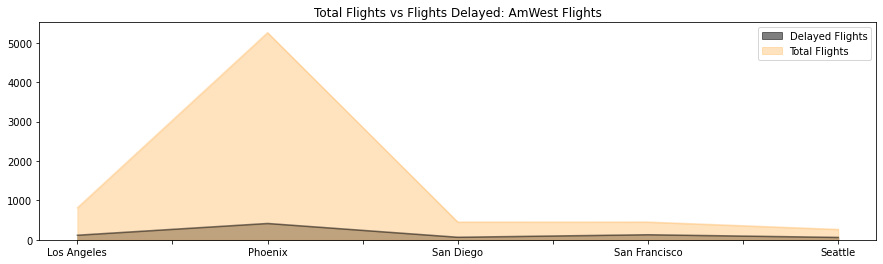

In [304]:
amWestTotalFlights = airportData.loc[2:4,'Los Angeles':].sum()
amWestdelayedFlights = airportData.loc[4,'Los Angeles':]
amWestFlights =  pd.DataFrame({'Delayed Flights': amWestdelayedFlights,'Total Flights':amWestTotalFlights})
amWestFlights.plot.area(title='Total Flights vs Flights Delayed: AmWest Flights', figsize=(15,4), stacked = False, colormap = 'copper')

In [288]:
flights = pd.DataFrame({'Total Flights Alaska':alaskatotalFlights,'Total Flights amWest':amWestTotalFlights,'Delayed Flights Alaska': alaskaDelayedFlights,'Delayed Flights amWest': amWestdelayedFlights})

___

# Which Airline was more dependable based on flight delay percentages?

### We take the amount of delayed flights from the prior two airline and divide it by the Total Amount of Flights from previous calculations 

In [318]:
delayPercent = pd.DataFrame({ 'Alaska Delay Percentage':alaskaDelayedFlights/alaskaTotalFlights,
                             'amWest Delay Percentage':amWestdelayedFlights/amWestTotalFlights})

#### *The import below helps eliminate a warning caused by setting the set_yticklabels

In [322]:
import warnings
warnings.simplefilter("ignore", UserWarning)

<AxesSubplot:title={'center':'Delay Percents based on Airline'}>

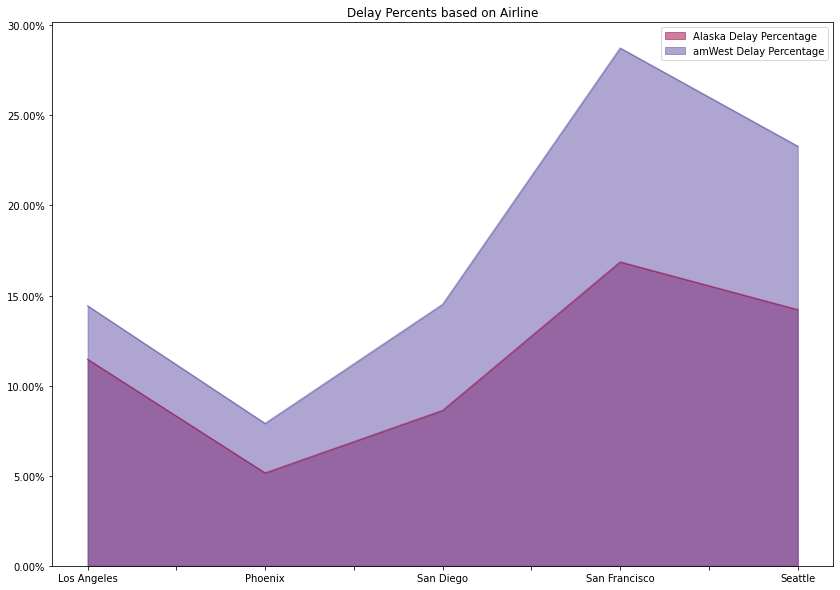

In [330]:
graph = delayPercent.plot.area(figsize=(14,10), stacked=False, colormap = 'Spectral', title = 'Delay Percents based on Airline')
vals = graph.get_yticks()
graph.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
graph

## Alaska has fewer delays per flight when compared to AMWest

## More Data fun!

<AxesSubplot:title={'center':'Total Flights per Airline'}>

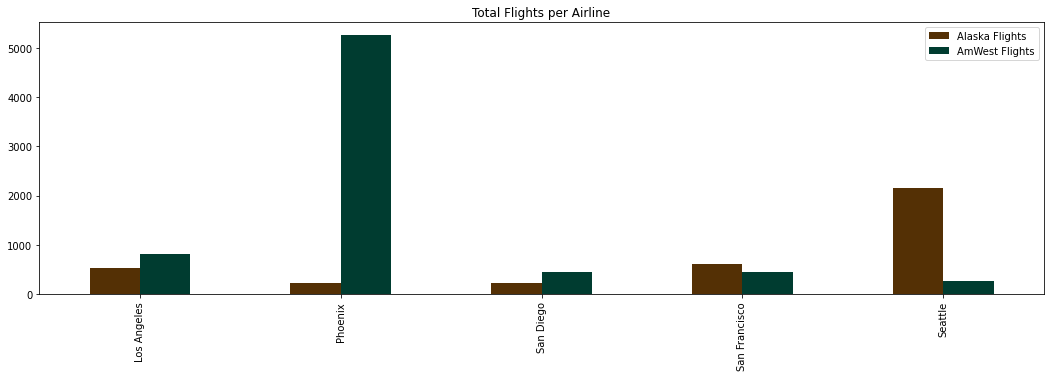

In [332]:
totalFlights = pd.DataFrame({'Alaska Flights':alaskaFlights.T.loc['Total Flights',:],'AmWest Flights':amWestFlights.T.loc['Total Flights',:]})
totalFlights.plot.bar(title='Total Flights per Airline',figsize=(18,5),colormap="BrBG")

<AxesSubplot:title={'center':'Total Delayed Flights per Airline'}>

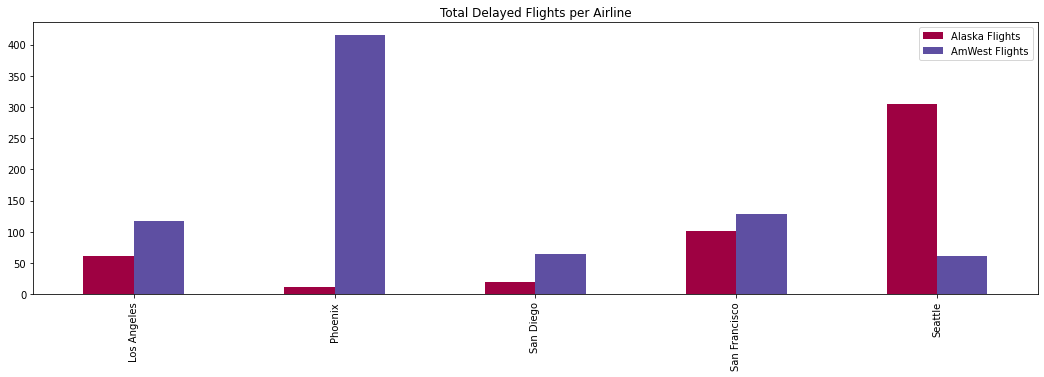

In [333]:
delayedFlights = pd.DataFrame({'Alaska Flights':alaskaFlights.T.loc['Delayed Flights',:],'AmWest Flights':amWestFlights.T.loc['Delayed Flights',:]})
delayedFlights.plot.bar(title='Total Delayed Flights per Airline',figsize=(18,5),colormap="Spectral")